<a href="https://colab.research.google.com/github/alaaguedda/parkinson/blob/main/parkinson_diseas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()     # Choose your parkinsons.csv file

Saving parkinsons.csv to parkinsons.csv


In [4]:
df = pd.read_csv("parkinsons.csv")

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


📌 SHAPE: (5875, 22)

📌 DATA TYPES:
subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

📌 DESCRIBE:
          subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000

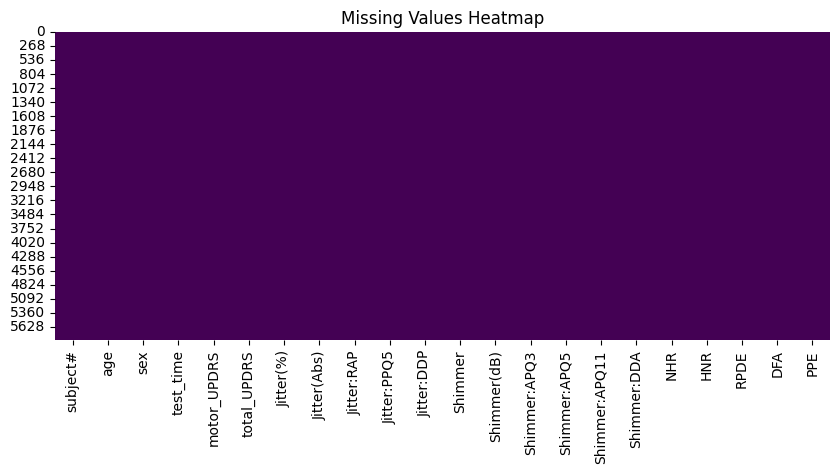

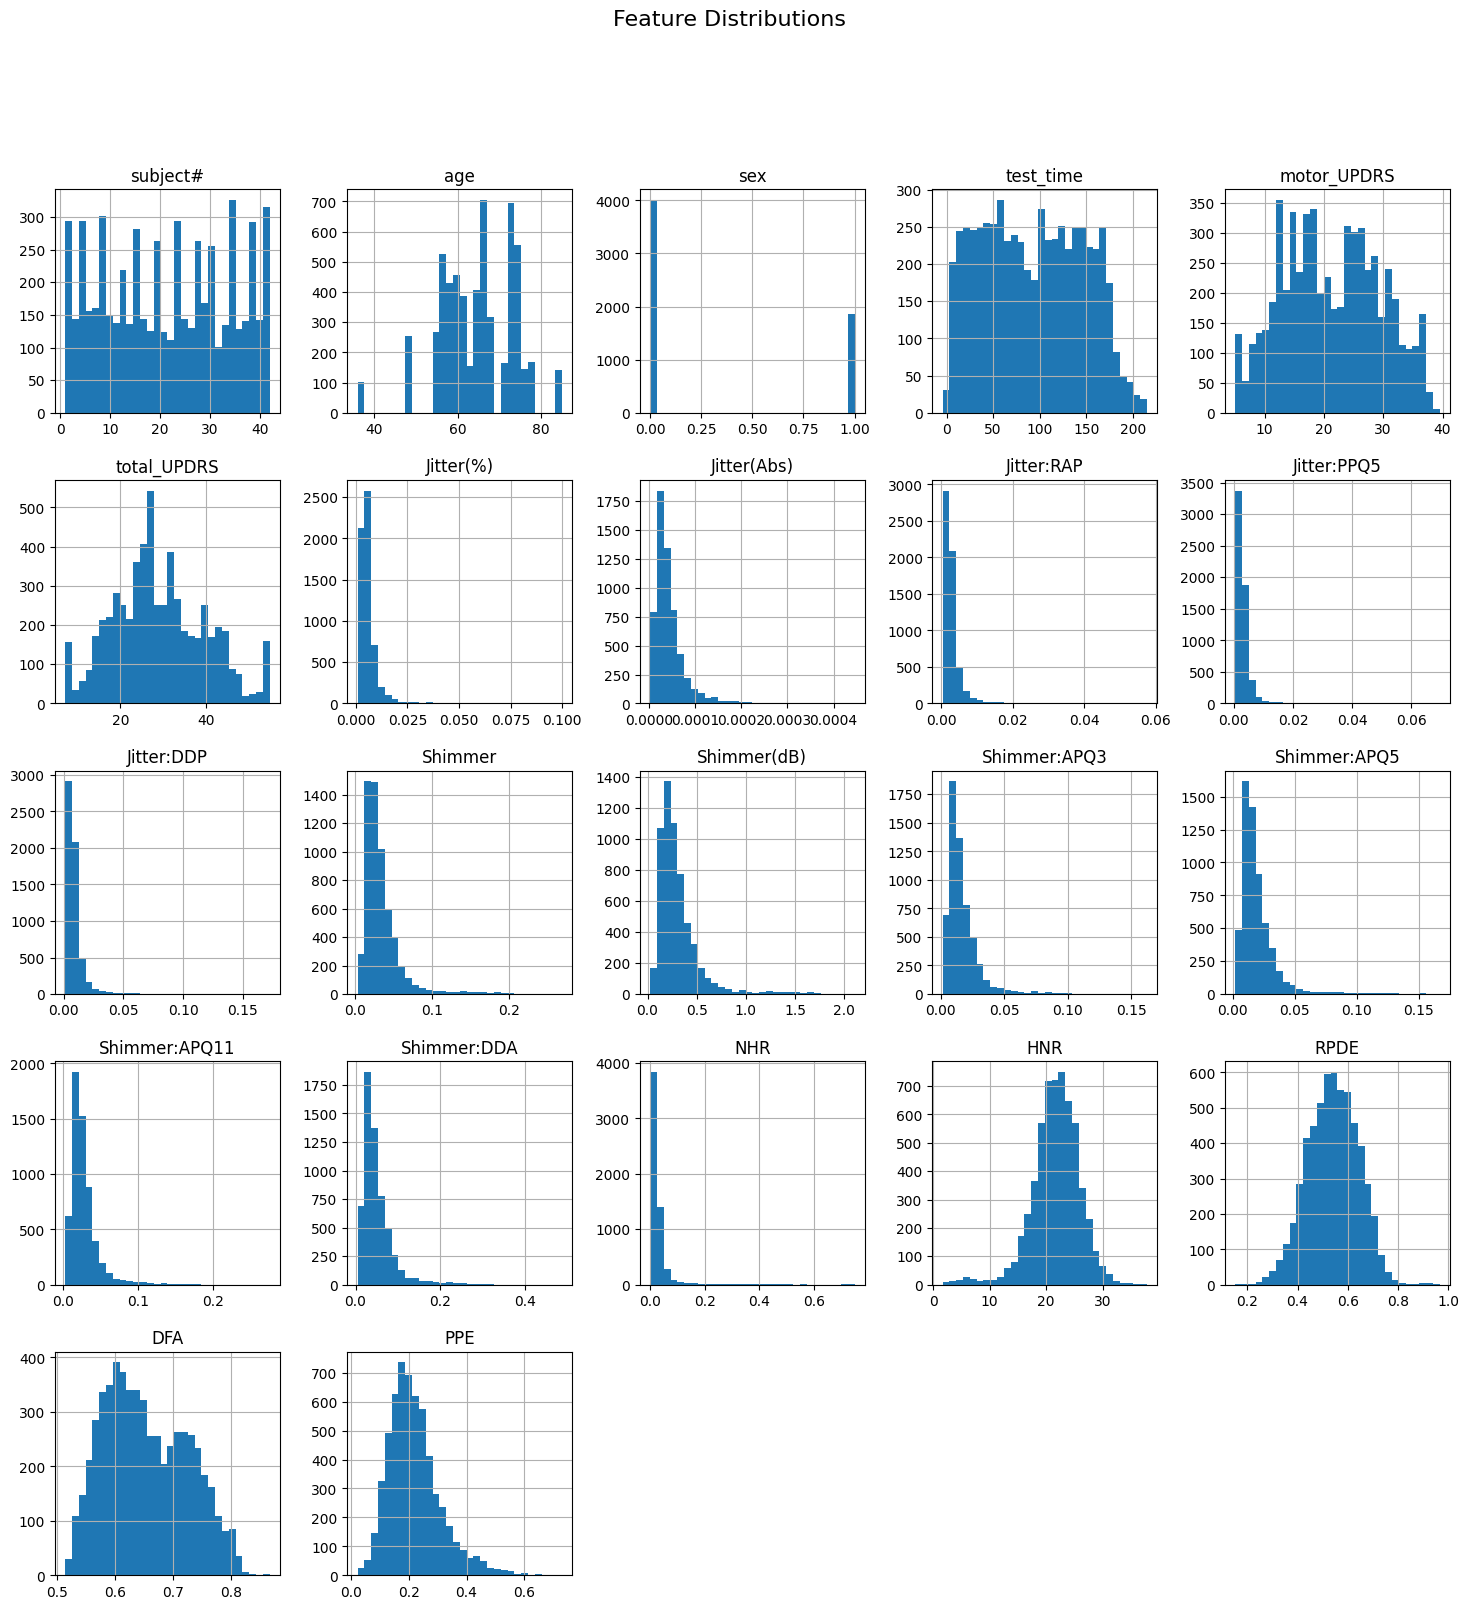

<Figure size 1600x1000 with 0 Axes>

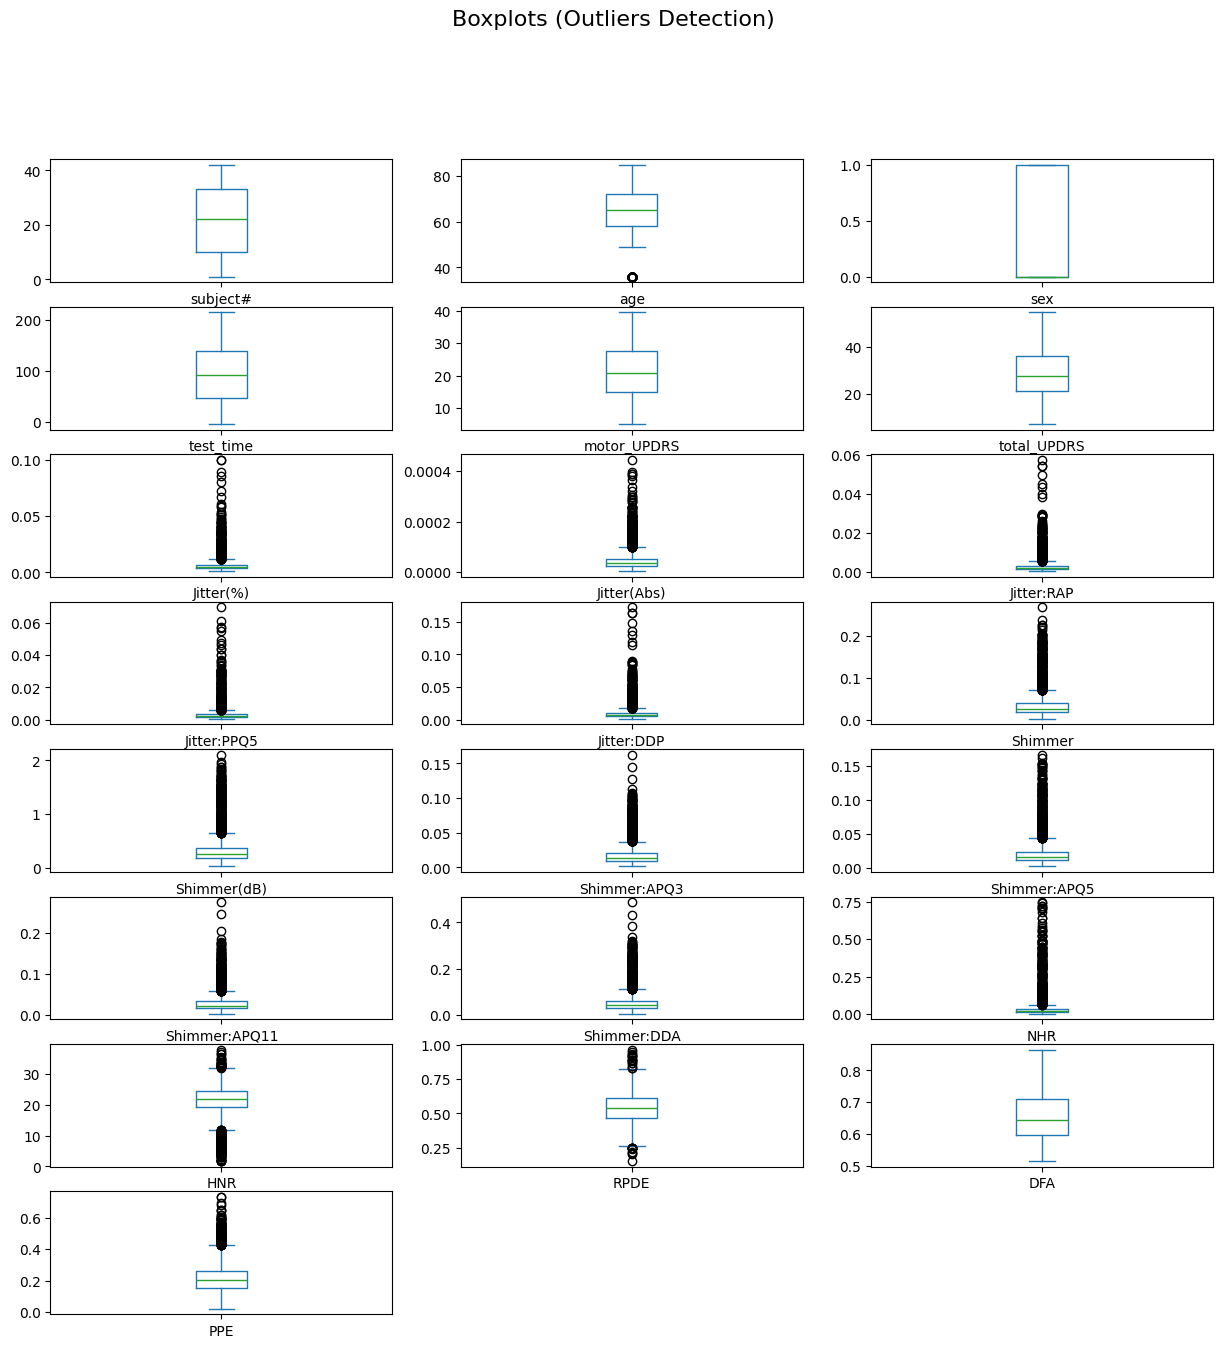

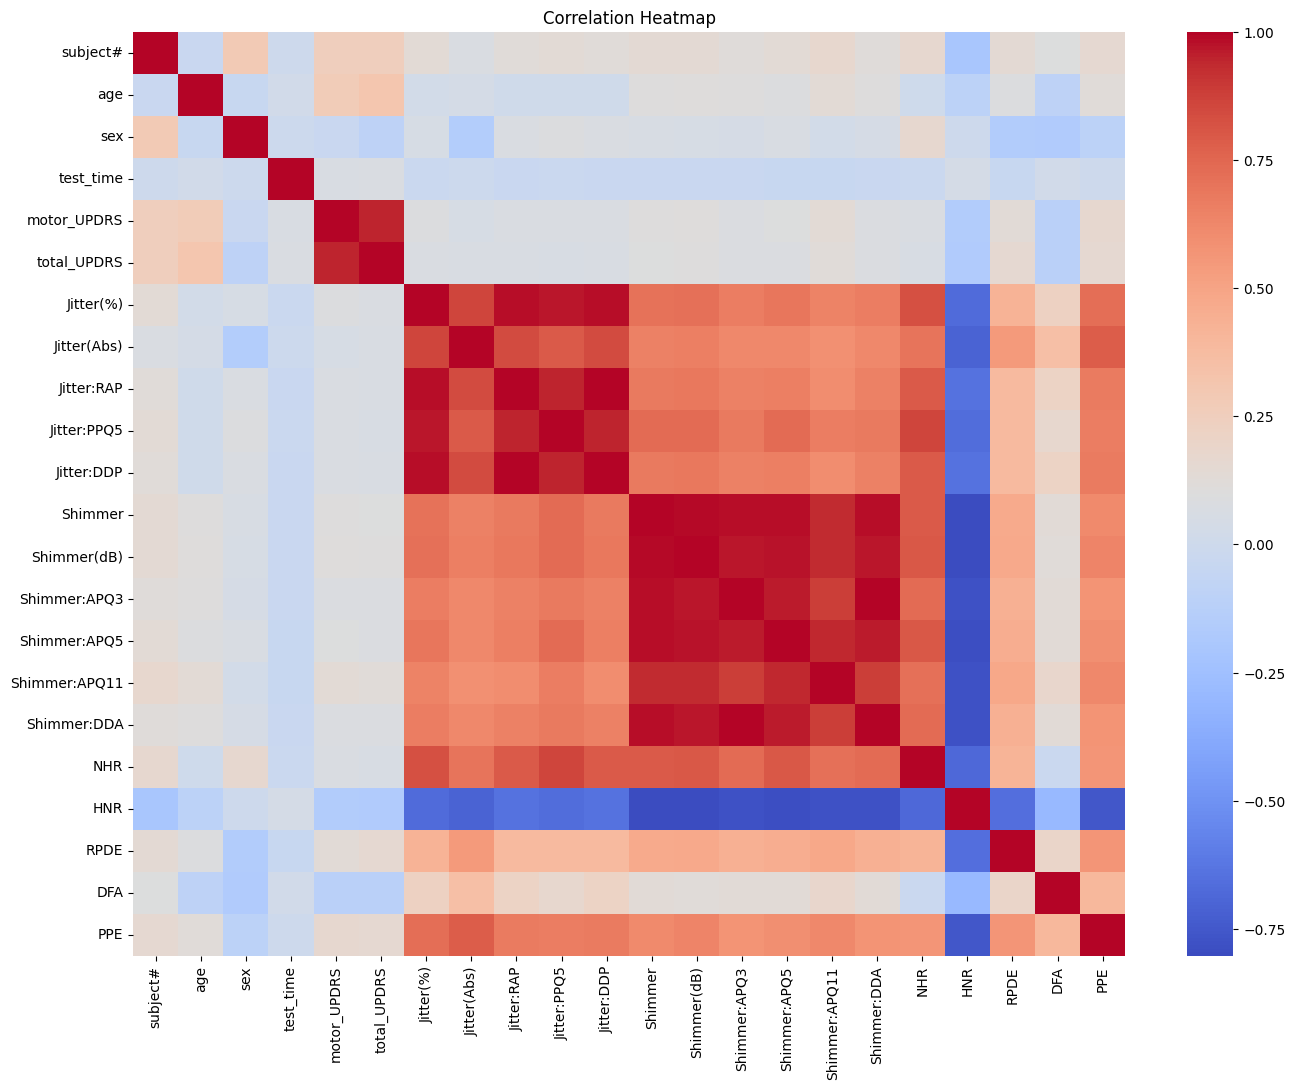


📌 Correlations with target variable: total_UPDRS
total_UPDRS      1.000000
motor_UPDRS      0.947231
age              0.310290
subject#         0.253643
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
Shimmer(dB)      0.098790
Shimmer          0.092141
Shimmer:APQ5     0.083467
Shimmer:DDA      0.079363
Shimmer:APQ3     0.079363
test_time        0.075263
Jitter(%)        0.074247
Jitter(Abs)      0.066927
Jitter:DDP       0.064027
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
NHR              0.060952
sex             -0.096559
DFA             -0.113475
HNR             -0.162117
Name: total_UPDRS, dtype: float64


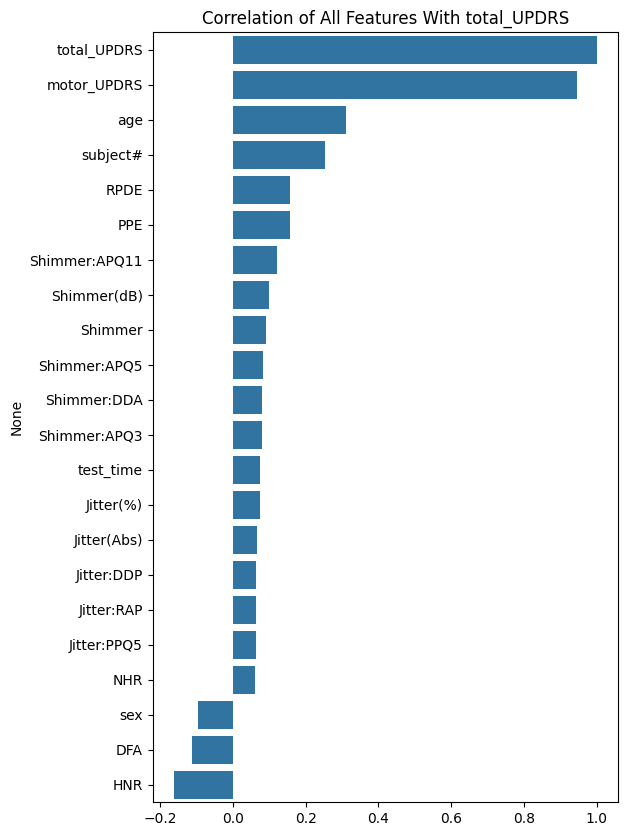

In [6]:
def visualize_data(df, target=None, pairplot=False):
    """
    A reusable visualization pipeline that produces:
    - Basic info
    - Missing values heatmap
    - Histograms
    - Boxplots
    - Correlation heatmap
    - Pairplot (optional)
    - Target correlation ranking (if target is provided)
    """

    # -------------------------
    # 1. BASIC INFO
    # -------------------------
    print("📌 SHAPE:", df.shape)
    print("\n📌 DATA TYPES:")
    print(df.dtypes)
    print("\n📌 DESCRIBE:")
    print(df.describe())

    # -------------------------
    # 2. MISSING VALUES MAP
    # -------------------------
    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()

    # -------------------------
    # 3. HISTOGRAMS
    # -------------------------
    df.hist(figsize=(18, 18), bins=30)
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()

    # -------------------------
    # 4. BOXPLOTS (Detect Outliers)
    # -------------------------
    num_cols = df.select_dtypes(include=np.number).columns
    plt.figure(figsize=(16, 10))
    df[num_cols].plot(kind="box", subplots=True, layout=(int(len(num_cols)/3)+1, 3),
                      figsize=(15, 15), sharex=False, sharey=False)
    plt.suptitle("Boxplots (Outliers Detection)", fontsize=16)
    plt.show()

    # -------------------------
    # 5. CORRELATION HEATMAP
    # -------------------------
    plt.figure(figsize=(16, 12))
    sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
    plt.title("Correlation Heatmap")
    plt.show()

    # -------------------------
    # 6. TARGET CORRELATION (optional)
    # -------------------------
    if target is not None and target in df.columns:
        print("\n📌 Correlations with target variable:", target)
        corr_values = df.corr()[target].sort_values(ascending=False)
        print(corr_values)

        plt.figure(figsize=(6, 10))
        sns.barplot(x=corr_values.values, y=corr_values.index)
        plt.title(f"Correlation of All Features With {target}")
        plt.show()

    # -------------------------
    # 7. PAIRPLOT (optional)
    # -------------------------
    if pairplot:
        print("⏳ Generating pairplot (can take time for many features)...")
        sns.pairplot(df[num_cols[:5]])  # limit first 5 numeric features to avoid lag
        plt.show()

visualize_data(df, target="total_UPDRS")


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def data_cleaning_pipeline(
    df,
    fill_numeric="median",        # "median", "mean", "zero"
    fill_categorical="mode",      # "mode", "missing"
    encode_method="onehot",       # "onehot" or "label"
    scale=False,                   # True or False
    outlier_method="iqr",         # "iqr" or None
    verbose=True                  # Print cleaning report
):
    """
    Full Data Cleaning Pipeline.
    Returns: cleaned_df, transformer, label_encoders
    """

    df = df.copy()
    report = {}

    # --------------------------------------------------
    # 1. Remove duplicates
    # --------------------------------------------------
    initial_rows = df.shape[0]
    df = df.drop_duplicates()
    report["duplicates_removed"] = initial_rows - df.shape[0]

    # --------------------------------------------------
    # 2. Separate numeric and categorical columns
    # --------------------------------------------------
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    # --------------------------------------------------
    # 3. Handle missing values
    # --------------------------------------------------
    # Numeric
    if fill_numeric == "median":
        df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    elif fill_numeric == "mean":
        df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    elif fill_numeric == "zero":
        df[num_cols] = df[num_cols].fillna(0)

    # Categorical
    if fill_categorical == "mode":
        for c in cat_cols:
            df[c] = df[c].fillna(df[c].mode()[0])
    elif fill_categorical == "missing":
        df[cat_cols] = df[cat_cols].fillna("Unknown")

    report["missing_after"] = df.isnull().sum().sum()

    # --------------------------------------------------
    # 4. Outlier handling (IQR)
    # --------------------------------------------------
    if outlier_method == "iqr":
        for col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = np.where(df[col] < lower, lower,
                               np.where(df[col] > upper, upper, df[col]))

    # --------------------------------------------------
    # 5. Encode categorical features
    # --------------------------------------------------
    label_encoders = {}

    if encode_method == "label":
        for col in cat_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le

    elif encode_method == "onehot":
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    # --------------------------------------------------
    # 6. Scaling
    # --------------------------------------------------
    scaler = None
    if scale:
        scaler = StandardScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])

    # --------------------------------------------------
    # 7. Cleaning report
    # --------------------------------------------------
    if verbose:
        print("\n===== DATA CLEANING REPORT =====")
        print(f"Duplicates removed: {report['duplicates_removed']}")
        print(f"Missing values after cleaning: {report['missing_after']}")
        print(f"Numeric columns: {num_cols}")
        print(f"Categorical columns: {cat_cols}")
        print(f"Encoding method: {encode_method}")
        print(f"Scaling applied: {scale}")
        print("================================\n")

    # Return cleaned DataFrame + scalers + encoders for future use
    return df, scaler, label_encoders


In [9]:
df_clean, scaler, encoders = data_cleaning_pipeline(df)



===== DATA CLEANING REPORT =====
Duplicates removed: 0
Missing values after cleaning: 0
Numeric columns: ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
Categorical columns: []
Encoding method: onehot
Scaling applied: False



In [ ]:
df_clean.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1.0,72.0,0.0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1.0,72.0,0.0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1.0,72.0,0.0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1.0,72.0,0.0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1.0,72.0,0.0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [10]:
df_clean.to_csv('parkinsons.csv', index=False)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import shutil

# Move the file to a folder inside Drive
shutil.move("parkinsons.csv", "/content/drive/MyDrive/parkinsons.csv")


'/content/drive/MyDrive/parkinsons.csv'

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/parkinsons.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1.0,72.0,0.0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1.0,72.0,0.0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1.0,72.0,0.0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1.0,72.0,0.0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1.0,72.0,0.0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
df['HNR'].describe()

,HNR
count,5875.000000
mean,21.784314
std,3.908086
min,11.849000
25%,19.406000
50%,21.920000
75%,24.444000
max,32.001000


In [ ]:
df["total_UPDRS"].describe()

,total_UPDRS
count,5875.000000
mean,29.018942
std,10.700283
min,7.000000
25%,21.371000
50%,27.576000
75%,36.399000
max,54.992000


In [ ]:
df["status"] = (df["total_UPDRS"] >44).astype(int)
df["status"].value_counts()


,count
status,
0,5323
1,552


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
df["cluster"] = kmeans.fit_predict(df[["total_UPDRS"]])


In [15]:
df["status"] = (df.groupby("cluster")["total_UPDRS"].transform("mean") < df["total_UPDRS"]).astype(int)
df.drop(columns=["cluster"], inplace=True)


In [16]:
# ----------------------------
# LINEAR REGRESSION WITH CROSS VALIDATION
# ----------------------------

# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error, root_mean_squared_error, r2_score,
    make_scorer
)

# ----------------------------
# 2. Prepare Linear Regression Data
# ----------------------------
target_lr = "HNR"
exclude_cols = ["HNR", "subject#", "status", "total_UPDRS", "motor_UPDRS"]

X_lr = df.drop(columns=exclude_cols)
y_lr = df[target_lr]

# Split (this split is still needed for final evaluation)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42
)

# Scale features
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

# ----------------------------
# 3. Cross Validation Setup
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()

# Custom scorers
mae_scorer = make_scorer(mean_absolute_error)
rmse_scorer = make_scorer(root_mean_squared_error)

# ----------------------------
# 4. Perform Cross-Validation
# ----------------------------
cv_r2 = cross_val_score(model, X_train_lr_scaled, y_train_lr, cv=kf, scoring="r2")
cv_mae = cross_val_score(model, X_train_lr_scaled, y_train_lr, cv=kf, scoring=mae_scorer)
cv_rmse = cross_val_score(model, X_train_lr_scaled, y_train_lr, cv=kf, scoring=rmse_scorer)

print("===== LINEAR REGRESSION CROSS-VALIDATION RESULTS =====")
print(f"R² mean:  {cv_r2.mean():.4f}   | std: {cv_r2.std():.4f}")
print(f"MAE mean: {cv_mae.mean():.4f}  | std: {cv_mae.std():.4f}")
print(f"RMSE mean:{cv_rmse.mean():.4f} | std: {cv_rmse.std():.4f}")

# ----------------------------
# 5. Train Final Linear Regression Model
# ----------------------------
linreg = LinearRegression()
linreg.fit(X_train_lr_scaled, y_train_lr)

# Predict on the fixed test set
y_pred_lr = linreg.predict(X_test_lr_scaled)

print("\n===== FINAL MODEL ON TEST SET =====")
print("R² score:", r2_score(y_test_lr, y_pred_lr))
print("MAE:", mean_absolute_error(y_test_lr, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test_lr, y_pred_lr))

# ----------------------------
# 6. Create dataset with predicted HNR
# ----------------------------
df_filled = df.copy()
X_all_scaled = scaler_lr.transform(df_filled.drop(columns=exclude_cols))
df_filled["HNR"] = linreg.predict(X_all_scaled)


===== LINEAR REGRESSION CROSS-VALIDATION RESULTS =====
R² mean:  0.8245   | std: 0.0068
MAE mean: 1.2897  | std: 0.0290
RMSE mean:1.6436 | std: 0.0357

===== FINAL MODEL ON TEST SET =====
R² score: 0.8288934805177604
MAE: 1.2369435629757597
RMSE: 1.5834130950724221


#**EXTRA PROJECT**

In [17]:
# ----------------------------
# LOGISTIC REGRESSION PART
# ----------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ----------------------------
# A. Logistic Regression BEFORE Filling HNR
# ----------------------------
target_log = "status"

X_log = df.drop(columns=["subject#", "status", "total_UPDRS", "motor_UPDRS"])
y_log = df[target_log]

# Train/test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

# Scale
scaler_log = StandardScaler()
X_train_log_scaled = scaler_log.fit_transform(X_train_log)
X_test_log_scaled = scaler_log.transform(X_test_log)

# SMOTE
sm = SMOTE(random_state=42)
X_train_log_resampled, y_train_log_resampled = sm.fit_resample(
    X_train_log_scaled, y_train_log
)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_log_resampled, y_train_log_resampled)

# Predict
y_pred_log = logreg.predict(X_test_log_scaled)

# Evaluate
acc_before = accuracy_score(y_test_log, y_pred_log)

print("\nLogistic Regression BEFORE filling HNR")
print("Accuracy:", acc_before)
print("Confusion Matrix:\n", confusion_matrix(y_test_log, y_pred_log))
print("\nClassification Report BEFORE filling HNR")
print(classification_report(y_test_log, y_pred_log))

# ----------------------------
# B. Logistic Regression AFTER Filling HNR
# ----------------------------
X_log_filled = df_filled.drop(columns=["subject#", "status", "total_UPDRS", "motor_UPDRS"])
y_log_filled = df_filled[target_log]

# Split
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(
    X_log_filled, y_log_filled, test_size=0.22, random_state=42
)

# Scale
scaler_filled = StandardScaler()
X_train_filled_scaled = scaler_filled.fit_transform(X_train_filled)
X_test_filled_scaled = scaler_filled.transform(X_test_filled)

# SMOTE
sm2 = SMOTE(random_state=42)
X_train_filled_resampled, y_train_filled_resampled = sm2.fit_resample(
    X_train_filled_scaled, y_train_filled
)

# Train
logreg_filled = LogisticRegression(max_iter=1000)
logreg_filled.fit(X_train_filled_resampled, y_train_filled_resampled)

# Predict
y_pred_filled = logreg_filled.predict(X_test_filled_scaled)

# Evaluate
acc_after = accuracy_score(y_test_filled, y_pred_filled)

print("\nLogistic Regression AFTER filling HNR")
print("Accuracy:", acc_after)
print("Confusion Matrix:\n", confusion_matrix(y_test_filled, y_pred_filled))
print("\nClassification Report AFTER filling HNR")
print(classification_report(y_test_filled, y_pred_filled))

# ----------------------------
# 9. Comparison
# ----------------------------
print("\nAccuracy comparison:")
print("Before filling HNR:", acc_before)
print("After filling HNR:", acc_after)



Logistic Regression BEFORE filling HNR
Accuracy: 0.6970212765957446
Confusion Matrix:
 [[384 169]
 [187 435]]

Classification Report BEFORE filling HNR
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       553
           1       0.72      0.70      0.71       622

    accuracy                           0.70      1175
   macro avg       0.70      0.70      0.70      1175
weighted avg       0.70      0.70      0.70      1175


Logistic Regression AFTER filling HNR
Accuracy: 0.7053364269141531
Confusion Matrix:
 [[420 185]
 [196 492]]

Classification Report AFTER filling HNR
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       605
           1       0.73      0.72      0.72       688

    accuracy                           0.71      1293
   macro avg       0.70      0.70      0.70      1293
weighted avg       0.71      0.71      0.71      1293


Accuracy comparison:
Before filling HNR: 